# Can political regimes correlate differently with the economic growth of the country? 
Anastasya Russu 

Economists do not have a consensus on that matter. Opponents of the theory say that for development, primary 
stability is needed, and democracy institutions are too breakable. For example, the fast economic growth of China, Japan 
and other Asian countries are explained by that. Democratic leaders can sacrifice the interest of economic growth to 
satisfy  the  needs  of  low-income  groups,  while  autocratic  regimes  can  maintain  unpopular  economic  policies.  To 
conclude, developing countries simply cannot afford such good democracy to develop. 

Supporters of that theory insist that autocratic regimes are too dependent on the personality of the country leader. 
The ways they try to keep power makes them inefficient and they lack the information necessary for the decision-making 
process, which leads to worse management. What makes democracy better regime for economic growth, it is protection 
of human life (i.e. human capital, which is necessary for economic growth). 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro
import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from itertools import combinations

Preparing data for analysis

In [4]:
#import V - DEM dataset
filename='democracy data.csv'
df_dem = pd.read_csv(filename)
df_dem.head()

C:\Users\russu_anastasiia\AppData\Local\Temp\ipykernel_11024\4213008117.py:3: DtypeWarning: Columns (364,365,366,394,410,821,831,832,930,1235,1252,1481,3063,3282,3283,3338,3340,3344,3345,3347,3348,3349) have mixed types. Specify dtype option on import or set low_memory=False.
  df_dem = pd.read_csv(filename)


,country_name,country_text_id,country_id,year,historical_date,project,historical,histname,codingstart,codingend,...,e_miurbpop,e_pefeliex,e_peinfmor,e_pelifeex,e_pematmor,e_wb_pop,e_civil_war,e_miinteco,e_miinterc,e_pt_coup
0,Mexico,MEX,3,1789,1789-12-31,1,1,Viceroyalty of New Spain,1789,2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
1,Mexico,MEX,3,1790,1790-12-31,1,1,Viceroyalty of New Spain,1789,2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2,Mexico,MEX,3,1791,1791-12-31,1,1,Viceroyalty of New Spain,1789,2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
3,Mexico,MEX,3,1792,1792-12-31,1,1,Viceroyalty of New Spain,1789,2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
4,Mexico,MEX,3,1793,1793-12-31,1,1,Viceroyalty of New Spain,1789,2021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN


In [5]:
#import GDP per capita from world bank data
filename='ec_gdp_growth.csv'
df_gdp = pd.read_csv(filename)
# cleaning data
df_gdp.replace('..', np.nan, inplace=True)
df_gdp = df_gdp[~df_gdp['2000 [YR2000]'].isna()]
df_gdp = df_gdp[~df_gdp['2019 [YR2019]'].isna()]
df_gdp = df_gdp[~df_gdp['2012 [YR2012]'].isna()]

df_gdp

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
1,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,Albania,ALB,-11.187905298961,7.63002243937019,1.58487281451019,1.18723435286199,1.98538809180384,2.51682705417127,3.48029321671386,3.89774060601475,4.27632565399514,2.52389372255597,-2.92582095677083,9.5548753337865
2,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,Algeria,DZA,-1.75407649193988,2.39949654373312,1.4017475601154,0.761699380455809,1.71045490361574,1.60049369648927,1.10457015569865,-0.750456691967514,-0.909245790879453,-0.934555885298352,-6.82696362311546,2.0658545045749
4,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,Andorra,AND,-0.133166844392832,1.91028641179476,-3.45153545003302,-1.5688713381525,4.51927941301172,3.02081678005885,4.64621154922207,0.734439351000333,1.57425431733354,1.83306059347608,-11.3207303470788,8.82406572722756
5,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,Angola,AGO,-6.65746725949467,-0.267956297993877,4.70440852719756,1.28760778892259,1.21734336059794,-2.47218813531357,-5.81613955070978,-3.41267936474142,-4.49694682670683,-3.86855912437153,-8.49308612116926,-2.46740354976019
6,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,Antigua and Barbuda,ATG,2.14522559903865,4.34085051945499,2.04993317307776,-1.79896658725413,2.61605230937501,2.70571843639473,4.43725332350857,2.16611404366698,5.93227628165489,3.96278455965997,-20.8549349330109,4.41783167040477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,Sub-Saharan Africa,SSF,-0.372505054753276,0.828496541216268,-0.00852483609943988,2.22618121146745,2.04890773900517,0.121086152671438,-1.40744813489808,-0.245488103769503,0.0119103778418008,-0.101357905489493,-4.50145600008616,1.48986983145831
262,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,Sub-Saharan Africa (excluding high income),SSA,-0.37671381462836,0.830501196360942,-0.00748983087372324,2.22532322338851,2.04907485218757,0.118827601125531,-1.4109119169289,-0.247376132733081,0.0113178582366231,-0.101980038319653,-4.49656558090025,1.4915979097093
263,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,Sub-Saharan Africa (IDA & IBRD countries),TSS,-0.372505054753319,0.828496541216268,-0.00852483609943988,2.22618121146741,2.04890773900522,0.121086152671438,-1.40744813489808,-0.24548810376956,0.0119103778418008,-0.101357905489451,-4.50145600008615,1.48986983145826
264,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,Upper middle income,UMC,-0.430964342795761,5.49423928019148,5.04110714371335,4.69869483798068,3.87564876595366,3.49937625985066,3.43874231613397,4.42542148919378,4.24274530526209,3.49076579520215,-1.07139172370094,7.01871818730862


Main variables: 
1.  Democracy.  
Question: How can the political regime overall be classified considering the competitiveness of access to power 
(polyarchy) as well as liberal principles? 
Responses: 0: Closed autocracy; 1: Electoral autocracy; 2: Electoral democracy; 3: Liberal democracy. 
Years: 1900-2021  
Scale: ordinal 
2.  Equal distribution of resources index 
Question: How equal is the distribution of resources? 
Responses: 0 is for total inequality. 1 for total equality.  
Scale: continuous. 
Years: 1900-2021 
3.  Political stability
Measures perceptions of the likelihood that the government in power will be destabilized or overthrown by possibly 
unconstitutional and/or violent means, including domestic violence and terrorism. 
Scale: ordinal 
Years: 1996-2020 
4.   State ownership of economy 
Question: Does the state own or directly control important sectors of the economy? 
Responses: 0 – totally, 4 – very little  
Scale: Ordinal, converted to interval by the measurement model. 
Years: 1789-2021 
5.  GDP per capita (annual %) 
GDP per capita is gross domestic product divided by population.  
Scale: continuous,  
Year: 1996 - 2021 

In [6]:
#selecting the variables for framework
df = df_dem[["country_name", 'country_text_id', "year",'v2x_regime', 'v2xeg_eqdr', 'e_wbgi_rqe', 'v2clstown'  ]]
df

,country_name,country_text_id,year,v2x_regime,v2xeg_eqdr,e_wbgi_rqe,v2clstown
0,Mexico,MEX,1789,NaN,NaN,NaN,-0.063
1,Mexico,MEX,1790,NaN,NaN,NaN,-0.063
2,Mexico,MEX,1791,NaN,NaN,NaN,-0.063
3,Mexico,MEX,1792,NaN,NaN,NaN,-0.063
4,Mexico,MEX,1793,NaN,NaN,NaN,-0.063
...,...,...,...,...,...,...,...
27375,Piedmont-Sardinia,SPD,1857,NaN,NaN,NaN,2.385
27376,Piedmont-Sardinia,SPD,1858,NaN,NaN,NaN,2.385
27377,Piedmont-Sardinia,SPD,1859,NaN,NaN,NaN,2.385
27378,Piedmont-Sardinia,SPD,1860,NaN,NaN,NaN,2.385


In [7]:
#cleaning data
df.replace('..', np.nan, inplace=True)
# transfer strings to the numbers 
df = df[~df['v2x_regime'].isna()]
df = df.astype({'v2x_regime': 'float'})
df = df[~df['e_wbgi_rqe'].isna()]
df = df.astype({'e_wbgi_rqe': 'float'})
df = df[~df['v2clstown'].isna()]
df = df.astype({'v2clstown': 'float'})
df.head()


C:\Users\russu_anastasiia\AppData\Local\Temp\ipykernel_11024\3556663936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('..', np.nan, inplace=True)


,country_name,country_text_id,year,v2x_regime,v2xeg_eqdr,e_wbgi_rqe,v2clstown
207,Mexico,MEX,1996,2.0,0.294,0.132,0.965
209,Mexico,MEX,1998,2.0,0.294,0.209,0.965
211,Mexico,MEX,2000,2.0,0.307,0.254,0.965
213,Mexico,MEX,2002,2.0,0.317,0.453,0.904
214,Mexico,MEX,2003,2.0,0.317,0.364,0.904


In [8]:
#renamig columns for convience
df = df.rename(columns={"country_name": "Country", "v2x_regime": "Democracy", "v2xeg_eqdr": "Distribution", "e_wbgi_rqe": "Stability", "v2clstown": "Ownership"})
df_gdp = df_gdp.rename(columns={"1990 [YR1990]": 1990, "2000 [YR2000]": 2000, "2012 [YR2012]": 2012, "2013 [YR2013]": 2013, "2014 [YR2014]": 2014, "2015 [YR2015]": 2015, "2016 [YR2016]": 2016, "2017 [YR2017]": 2017, "2018 [YR2018]": 2018, "2019 [YR2019]": 2019, "2020 [YR2020]": 2020, "2021 [YR2021]": 2021})
df_gdp = df_gdp.dropna()
df = df.dropna()

In [9]:
df_gdp

,Series Name,Series Code,Country Name,Country Code,1990,2000,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,Albania,ALB,-11.187905298961,7.63002243937019,1.58487281451019,1.18723435286199,1.98538809180384,2.51682705417127,3.48029321671386,3.89774060601475,4.27632565399514,2.52389372255597,-2.92582095677083,9.5548753337865
2,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,Algeria,DZA,-1.75407649193988,2.39949654373312,1.4017475601154,0.761699380455809,1.71045490361574,1.60049369648927,1.10457015569865,-0.750456691967514,-0.909245790879453,-0.934555885298352,-6.82696362311546,2.0658545045749
4,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,Andorra,AND,-0.133166844392832,1.91028641179476,-3.45153545003302,-1.5688713381525,4.51927941301172,3.02081678005885,4.64621154922207,0.734439351000333,1.57425431733354,1.83306059347608,-11.3207303470788,8.82406572722756
5,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,Angola,AGO,-6.65746725949467,-0.267956297993877,4.70440852719756,1.28760778892259,1.21734336059794,-2.47218813531357,-5.81613955070978,-3.41267936474142,-4.49694682670683,-3.86855912437153,-8.49308612116926,-2.46740354976019
6,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,Antigua and Barbuda,ATG,2.14522559903865,4.34085051945499,2.04993317307776,-1.79896658725413,2.61605230937501,2.70571843639473,4.43725332350857,2.16611404366698,5.93227628165489,3.96278455965997,-20.8549349330109,4.41783167040477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,Sub-Saharan Africa,SSF,-0.372505054753276,0.828496541216268,-0.00852483609943988,2.22618121146745,2.04890773900517,0.121086152671438,-1.40744813489808,-0.245488103769503,0.0119103778418008,-0.101357905489493,-4.50145600008616,1.48986983145831
262,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,Sub-Saharan Africa (excluding high income),SSA,-0.37671381462836,0.830501196360942,-0.00748983087372324,2.22532322338851,2.04907485218757,0.118827601125531,-1.4109119169289,-0.247376132733081,0.0113178582366231,-0.101980038319653,-4.49656558090025,1.4915979097093
263,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,Sub-Saharan Africa (IDA & IBRD countries),TSS,-0.372505054753319,0.828496541216268,-0.00852483609943988,2.22618121146741,2.04890773900522,0.121086152671438,-1.40744813489808,-0.24548810376956,0.0119103778418008,-0.101357905489451,-4.50145600008615,1.48986983145826
264,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,Upper middle income,UMC,-0.430964342795761,5.49423928019148,5.04110714371335,4.69869483798068,3.87564876595366,3.49937625985066,3.43874231613397,4.42542148919378,4.24274530526209,3.49076579520215,-1.07139172370094,7.01871818730862


Preparing data for 2000, 2012 and 2019 years

In [10]:
df_1 = df[df['year'] == 2000]
Country_code = df_1['country_text_id']
#adding the 2000 year GDP to the 2000 year dataset
country_to_gdp = dict(zip(df_gdp['Country Code'], df_gdp[2000]))
df_1['GDP per capita'] = df_1['country_text_id'].map(country_to_gdp)
df_1.head()

C:\Users\russu_anastasiia\AppData\Local\Temp\ipykernel_11024\4215609853.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['GDP per capita'] = df_1['country_text_id'].map(country_to_gdp)


,Country,country_text_id,year,Democracy,Distribution,Stability,Ownership,GDP per capita
211,Mexico,MEX,2000,2.0,0.307,0.254,0.965,3.4409763287365
333,Suriname,SUR,2000,2.0,0.661,-0.571,0.012,0.893731469048191
566,Sweden,SWE,2000,3.0,0.967,1.405,1.586,4.59825479417304
790,Switzerland,CHE,2000,3.0,0.970,1.859,1.889,3.3937476814814
910,Ghana,GHA,2000,2.0,0.416,-0.067,1.000,1.1908213838439


In [11]:
df_1

,Country,country_text_id,year,Democracy,Distribution,Stability,Ownership,GDP per capita
211,Mexico,MEX,2000,2.0,0.307,0.254,0.965,3.4409763287365
333,Suriname,SUR,2000,2.0,0.661,-0.571,0.012,0.893731469048191
566,Sweden,SWE,2000,3.0,0.967,1.405,1.586,4.59825479417304
790,Switzerland,CHE,2000,3.0,0.970,1.859,1.889,3.3937476814814
910,Ghana,GHA,2000,2.0,0.416,-0.067,1.000,1.1908213838439
...,...,...,...,...,...,...,...,...
25234,Slovenia,SVN,2000,3.0,0.979,0.692,0.735,NaN
25356,Solomon Islands,SLB,2000,1.0,0.234,-1.390,0.893,-16.5771960073575
25478,Vanuatu,VUT,2000,2.0,0.712,-0.426,0.855,3.80303715737882
25529,United Arab Emirates,ARE,2000,0.0,0.527,0.729,-1.615,NaN


In [12]:
df_2 = df[df['year'] == 2012]
# adding 2012 to the 2012 year dataset
country_to_gdp = dict(zip(df_gdp['Country Code'], df_gdp[2012]))
df_2['GDP per capita'] = df_2['country_text_id'].map(country_to_gdp)
df_2.head()

C:\Users\russu_anastasiia\AppData\Local\Temp\ipykernel_11024\2291433247.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['GDP per capita'] = df_2['country_text_id'].map(country_to_gdp)


,Country,country_text_id,year,Democracy,Distribution,Stability,Ownership,GDP per capita
223,Mexico,MEX,2012,2.0,0.316,0.477,0.986,2.24713983020912
345,Suriname,SUR,2012,2.0,0.707,-0.473,0.012,1.53869362118127
578,Sweden,SWE,2012,3.0,0.959,1.908,1.586,-1.32100232444557
802,Switzerland,CHE,2012,3.0,0.970,1.658,2.333,0.148135706748036
922,Ghana,GHA,2012,3.0,0.537,0.128,1.369,6.73355567711647


In [13]:
# adding 2019 GDP to the 2019 year dataset
df_3 = df[df['year'] == 2019]
country_to_gdp = dict(zip(df_gdp['Country Code'], df_gdp[2019]))
df_3['GDP per capita'] = df_3['country_text_id'].map(country_to_gdp)
df_3.head()

C:\Users\russu_anastasiia\AppData\Local\Temp\ipykernel_11024\1899291894.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['GDP per capita'] = df_3['country_text_id'].map(country_to_gdp)


,Country,country_text_id,year,Democracy,Distribution,Stability,Ownership,GDP per capita
230,Mexico,MEX,2019,2.0,0.360,0.104,0.938,-1.26932197948273
352,Suriname,SUR,2019,2.0,0.701,-0.680,-0.331,0.163586537511492
585,Sweden,SWE,2019,3.0,0.888,1.802,1.466,0.957561656419784
809,Switzerland,CHE,2019,3.0,0.970,1.665,2.333,0.491609144873692
929,Ghana,GHA,2019,3.0,0.568,-0.111,1.547,4.22918126352458


In [14]:
#unite 2000, 2012 and 2019 year to one dataset
df_final = pd.concat([df_1, df_2, df_3])
df_final.dtypes

Country             object
country_text_id     object
year                 int64
Democracy          float64
Distribution       float64
Stability          float64
Ownership          float64
GDP per capita      object
dtype: object

In [15]:
#GDP per capita convert to float
df_final['GDP per capita'] = df_final['GDP per capita'].astype(float)

In [16]:
df_final.dtypes

Country             object
country_text_id     object
year                 int64
Democracy          float64
Distribution       float64
Stability          float64
Ownership          float64
GDP per capita     float64
dtype: object

In [17]:
df_final

,Country,country_text_id,year,Democracy,Distribution,Stability,Ownership,GDP per capita
211,Mexico,MEX,2000,2.0,0.307,0.254,0.965,3.440976
333,Suriname,SUR,2000,2.0,0.661,-0.571,0.012,0.893731
566,Sweden,SWE,2000,3.0,0.967,1.405,1.586,4.598255
790,Switzerland,CHE,2000,3.0,0.970,1.859,1.889,3.393748
910,Ghana,GHA,2000,2.0,0.416,-0.067,1.000,1.190821
...,...,...,...,...,...,...,...,...
25253,Slovenia,SVN,2019,3.0,0.924,1.009,0.916,NaN
25375,Solomon Islands,SLB,2019,2.0,0.190,-0.832,0.893,-1.358803
25497,Vanuatu,VUT,2019,2.0,0.763,-0.461,0.855,0.760014
25548,United Arab Emirates,ARE,2019,0.0,0.876,0.979,-0.636,NaN


# 2000 year

# Hypothesis 1. GDP per capita across different democracy groups is the same.  

In [18]:
df_1 = df_final[df_final['year'] == 2000]
df_1 = df_1.dropna()

In [19]:
df_1

,Country,country_text_id,year,Democracy,Distribution,Stability,Ownership,GDP per capita
211,Mexico,MEX,2000,2.0,0.307,0.254,0.965,3.440976
333,Suriname,SUR,2000,2.0,0.661,-0.571,0.012,0.893731
566,Sweden,SWE,2000,3.0,0.967,1.405,1.586,4.598255
790,Switzerland,CHE,2000,3.0,0.970,1.859,1.889,3.393748
910,Ghana,GHA,2000,2.0,0.416,-0.067,1.000,1.190821
...,...,...,...,...,...,...,...,...
24675,Saudi Arabia,SAU,2000,0.0,0.670,-0.103,-1.278,3.226493
25011,Seychelles,SYC,2000,1.0,0.888,-0.806,-0.365,0.612195
25166,Singapore,SGP,2000,1.0,0.939,2.142,-0.784,7.165988
25356,Solomon Islands,SLB,2000,1.0,0.234,-1.390,0.893,-16.577196


In [20]:

print(df_1.groupby('Democracy').std())
print(df_1.groupby('Democracy').count())


           year  Distribution  Stability  Ownership  GDP per capita
Democracy                                                          
0.0         0.0      0.254800   0.985572   1.013584        4.928335
1.0         0.0      0.229550   0.708920   0.978763        5.279291
2.0         0.0      0.236972   0.481275   0.606112        4.138399
3.0         0.0      0.138404   0.514237   0.583215        2.112017
           Country  country_text_id  year  Distribution  Stability  Ownership  \
Democracy                                                                       
0.0             21               21    21            21         21         21   
1.0             38               38    38            38         38         38   
2.0             41               41    41            41         41         41   
3.0             28               28    28            28         28         28   

           GDP per capita  
Democracy                  
0.0                    21  
1.0                  

we can see that std is decrese with liberalization of regime: 
indicators for stability, distribution, ownership in autocracies(0) varies a lot more then for liberal democracies

H0: the mean GDP per capita of the groups are the same. 

First, we need to check for the validity of its main assumptions:

Independence of the observations - Independence is straightforward: all our observations come from different countries which we can consider as independent.

Each sample has the same sample size - for 2000 year sample sizes are different and in group of closed authtocracy is less then 30 observations.

Checking for the next assumptions are not nessecary as we already do not have same sample sizes
Each sample has a normal distribution 
These distributions have the same variance (homoscedasticity)

In [21]:
set(df_1.Democracy)
democracies = [0, 1, 2, 3]

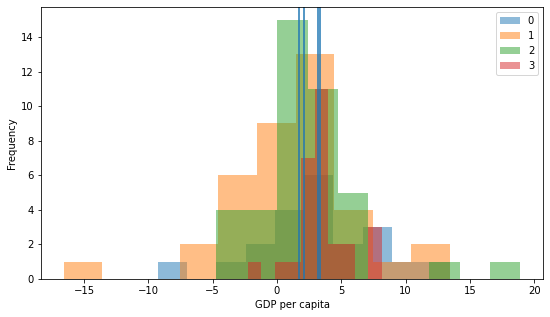

In [22]:
#plot graph to look at distribution
plt.figure(figsize=(9,5))
for dem in democracies:
    plt.hist(df_1[df_1.Democracy==dem]['GDP per capita'],alpha=0.5,label=dem)
    plt.axvline(np.median(df_1[df_1.Democracy==dem]['GDP per capita']))
plt.xlabel('GDP per capita')
plt.ylabel('Frequency')
plt.legend()
plt.show()

visually all four distributions are similar, means are close.

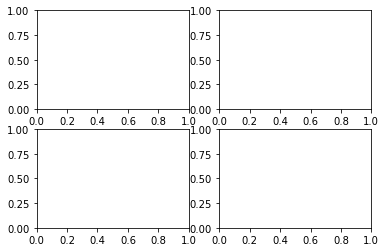

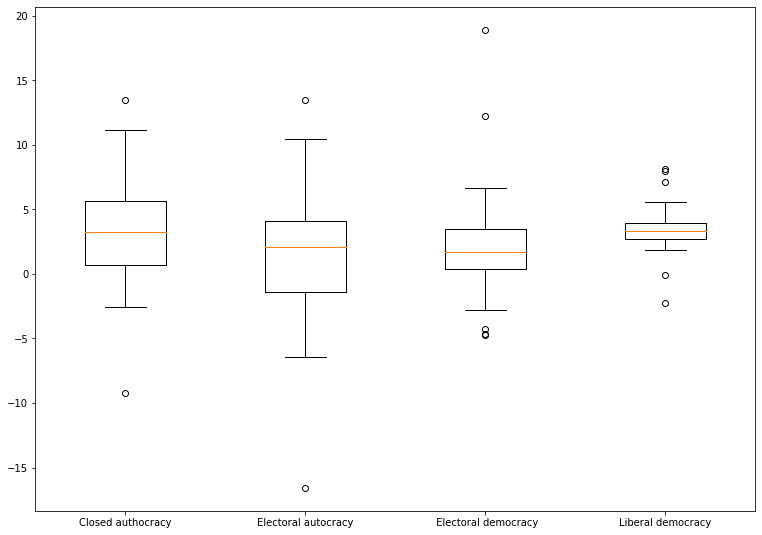

In [23]:
fig, axs = plt.subplots(2, 2)
data = [df_1[df_1.Democracy==0]['GDP per capita'], df_1[df_1.Democracy==1]['GDP per capita'], df_1[df_1.Democracy==2]['GDP per capita'], df_1[df_1.Democracy==3]['GDP per capita']] 
   
fig = plt.figure(figsize =(10, 7)) 
   
# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1]) 
   
# Creating plot 
bp = ax.boxplot(data) 
# x-axis labels 
ax.set_xticklabels(['Closed authocracy', 'Electoral autocracy', ' Electoral democracy', 'Liberal democracy']) 
   
# show plot 
plt.show() 

on boxplots we can see that means visually quite similar.

In [24]:
array_0 = df_1[df_1.Democracy==0]['GDP per capita']
array_1 = df_1[df_1.Democracy==1]['GDP per capita']
array_2 = df_1[df_1.Democracy==2]['GDP per capita']
array_3 = df_1[df_1.Democracy==3]['GDP per capita']


In [25]:
stats.kruskal(array_0,array_1,array_2,array_3)

KruskalResult(statistic=7.77926003856777, pvalue=0.05080097159875933)

p-value >> 0.05 (but very close) --> We cannot reject the null hypothesis that the population medians of all the groups are the same.

# Hypothesis 2. The level of democracy, equal distribution of resources, political stability, state ownership of economy correlates with economic growth of the country. 
Part  of  the  variables  are  continuous,  while  others  have  ordinal  scale.  It  makes  the  Spearman  correlation  most 
suitable method to test correlation between these variables.  
H0: there is no monotonic relationship between the democracy and the GDP per capita in the population.  
H0: there is no monotonic relationship between the equal distribution of resources and the GDP per capita in the 
population.  
H0: there is no monotonic relationship between the political stability and the GDP per capita in the population. 
H0: there is no monotonic relationship between the state ownership and the GDP per capita in the population. 

In [26]:
#H0: there is no monotonic relationship between the democracy and the GDP per capita in the population.
indicator_1 = 'GDP per capita'
indicator_2 = 'Democracy'
x = df_1[indicator_1]
y = df_1[indicator_2]

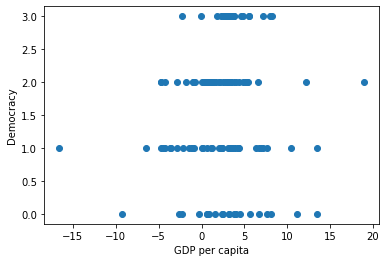

In [27]:
plt.plot(x,y,'o')
plt.xlabel(indicator_1)
plt.ylabel(indicator_2)
plt.show()

In [28]:
stats.spearmanr(x,y)

SpearmanrResult(correlation=0.10126357513835549, pvalue=0.25539026298242573)

p value 0.26 is more then 0.05, and we cannot reject null hypothesis. There is no monotonic correlation between democracy and GDP per capita

there is no monotonic relationship between the equal distribution of resources and the GDP per capita in the population.

In [29]:
indicator_1 = 'GDP per capita'
indicator_2 = 'Distribution'
x = df_1[indicator_1]
y = df_1[indicator_2]

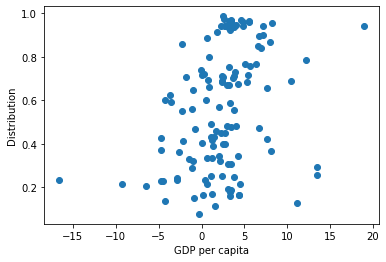

In [30]:
plt.plot(x,y,'o')
plt.xlabel(indicator_1)
plt.ylabel(indicator_2)
plt.show()

In [31]:
stats.spearmanr(x,y)

SpearmanrResult(correlation=0.37595135910902855, pvalue=1.2243022844407645e-05)

p value is less then 0.05, and we can reject null hypothesis. There is a monotonic correlation (0.38) between equal distribution of resources and GDP per capita. 

In [32]:
#H0: there is no monotonic relationship between the political stability and the GDP per capita in the population
indicator_1 = 'GDP per capita'
indicator_2 = 'Stability'
x = df_1[indicator_1]
y = df_1[indicator_2]

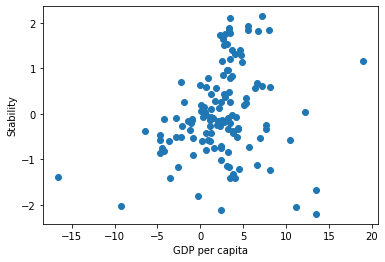

In [33]:
plt.plot(x,y,'o')
plt.xlabel(indicator_1)
plt.ylabel(indicator_2)
plt.show()

In [34]:
stats.spearmanr(x,y)

SpearmanrResult(correlation=0.2483244039765075, pvalue=0.0047086090022654785)

p value 0.0047 is less then 0.05, and we can reject null hypothesis. There is monotonic correlation (0.25) between political stabiliity and GDP per capita

In [35]:
#H0: there is no monotonic relationship between the state ownership and the GDP per capita in the population.
indicator_1 = 'GDP per capita'
indicator_2 = 'Ownership'
x = df_1[indicator_1]
y = df_1[indicator_2]

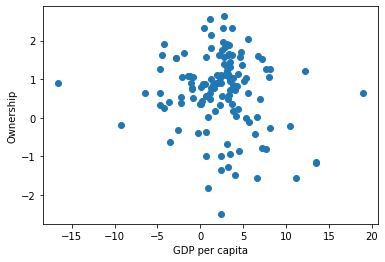

In [36]:
plt.plot(x,y,'o')
plt.xlabel(indicator_1)
plt.ylabel(indicator_2)
plt.show()

In [37]:
stats.spearmanr(x,y)

SpearmanrResult(correlation=-0.0659052022602936, pvalue=0.459833009152704)

p value 0.46 is more then 0.05, and we cannot reject null hypothesis. There is no monotonic correlation between state ownership of economy and GDP per capita

#  What factors, connected with democracy, affect economic growth the most?
H0: beta coefficient is equal to zero

method: linear regression

In [38]:
#variables for linear regression
target = 'GDP per capita'
input_vars = ['Democracy',
            'Distribution', 
              'Stability', 
              'Ownership'
            ]

In [39]:
np.asarray(df_1)

array([['Mexico', 'MEX', 2000, ..., 0.254, 0.965, 3.4409763287365],
       ['Suriname', 'SUR', 2000, ..., -0.571, 0.012, 0.893731469048191],
       ['Sweden', 'SWE', 2000, ..., 1.405, 1.586, 4.59825479417304],
       ...,
       ['Singapore', 'SGP', 2000, ..., 2.142, -0.784, 7.16598820156491],
       ['Solomon Islands', 'SLB', 2000, ..., -1.39, 0.893,
        -16.5771960073575],
       ['Vanuatu', 'VUT', 2000, ..., -0.426, 0.855, 3.80303715737882]],
      dtype=object)

<AxesSubplot:>

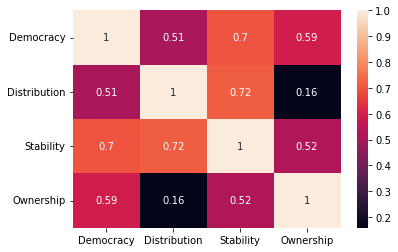

In [40]:
sns.heatmap(df_1[input_vars].corr(),annot=True)

In [41]:
X = df_1[input_vars]

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) 
                     for i in range(X.shape[1])]

In [42]:
vif

,features,VIF Factor
0,Democracy,7.074636
1,Distribution,4.728038
2,Stability,1.244210
3,Ownership,2.531657


VIF and graph show big multicollineary of variables. I will use subset selection to reduce the number of variables

In [43]:
var_combinations = []
for n in range(len(input_vars) + 1):
    combinations_length_n = list(combinations(input_vars, n))
    for comb in combinations_length_n:
        var_list = [x for x in comb]
        var_combinations.append(var_list)

In [44]:
n=3
combinations_length_n = list(combinations(input_vars, n))
print(combinations_length_n)

[('Democracy', 'Distribution', 'Stability'), ('Democracy', 'Distribution', 'Ownership'), ('Democracy', 'Stability', 'Ownership'), ('Distribution', 'Stability', 'Ownership')]


In [45]:
var_combinations

[[],
 ['Democracy'],
 ['Distribution'],
 ['Stability'],
 ['Ownership'],
 ['Democracy', 'Distribution'],
 ['Democracy', 'Stability'],
 ['Democracy', 'Ownership'],
 ['Distribution', 'Stability'],
 ['Distribution', 'Ownership'],
 ['Stability', 'Ownership'],
 ['Democracy', 'Distribution', 'Stability'],
 ['Democracy', 'Distribution', 'Ownership'],
 ['Democracy', 'Stability', 'Ownership'],
 ['Distribution', 'Stability', 'Ownership'],
 ['Democracy', 'Distribution', 'Stability', 'Ownership']]

In [46]:
y = df_1[target]

adj_rsquared_results = []
for comb in var_combinations:
    
    X = df_1[comb]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()

    print(comb,model.rsquared_adj)
    adj_rsquared_results.append((model.rsquared_adj, comb))

[] 2.220446049250313e-16
['Democracy'] -0.002287285665865557
['Distribution'] 0.10276778647912432
['Stability'] 0.0375008985094305
['Ownership'] 0.015065205200783138
['Democracy', 'Distribution'] 0.10774854284166413
['Democracy', 'Stability'] 0.0405277815443319
['Democracy', 'Ownership'] 0.049004866475227615
['Distribution', 'Stability'] 0.09694193540472917
['Distribution', 'Ownership'] 0.1388377372583517
['Stability', 'Ownership'] 0.1257093867688126
['Democracy', 'Distribution', 'Stability'] 0.10142845106709986
['Democracy', 'Distribution', 'Ownership'] 0.13221037081900688
['Democracy', 'Stability', 'Ownership'] 0.11878287866722581
['Distribution', 'Stability', 'Ownership'] 0.143605098445319
['Democracy', 'Distribution', 'Stability', 'Ownership'] 0.13692102964432284


In [47]:
sorted(adj_rsquared_results, reverse= True)


[(0.143605098445319, ['Distribution', 'Stability', 'Ownership']),
 (0.1388377372583517, ['Distribution', 'Ownership']),
 (0.13692102964432284,
  ['Democracy', 'Distribution', 'Stability', 'Ownership']),
 (0.13221037081900688, ['Democracy', 'Distribution', 'Ownership']),
 (0.1257093867688126, ['Stability', 'Ownership']),
 (0.11878287866722581, ['Democracy', 'Stability', 'Ownership']),
 (0.10774854284166413, ['Democracy', 'Distribution']),
 (0.10276778647912432, ['Distribution']),
 (0.10142845106709986, ['Democracy', 'Distribution', 'Stability']),
 (0.09694193540472917, ['Distribution', 'Stability']),
 (0.049004866475227615, ['Democracy', 'Ownership']),
 (0.0405277815443319, ['Democracy', 'Stability']),
 (0.0375008985094305, ['Stability']),
 (0.015065205200783138, ['Ownership']),
 (2.220446049250313e-16, []),
 (-0.002287285665865557, ['Democracy'])]

In [48]:
#the best model is with only one variable - dictribution, so I will use it in the linear regression
max(adj_rsquared_results)

(0.143605098445319, ['Distribution', 'Stability', 'Ownership'])

In [49]:
selected_vars = max(adj_rsquared_results)[1]
selected_vars

['Distribution', 'Stability', 'Ownership']

In [50]:
# define the variables
X = df_1[selected_vars]
y = df_1[target]

# add constant to predictor variables (i.e. the intercept)
X = sm.add_constant(X)

# fit linear regression model
model_sm = sm.OLS(y, X).fit()

# view model summary
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:         GDP per capita   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     8.099
Date:                Mon, 02 Jan 2023   Prob (F-statistic):           5.72e-05
Time:                        19:07:57   Log-Likelihood:                -358.18
No. Observations:                 128   AIC:                             724.4
Df Residuals:                     124   BIC:                             735.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.1231      1.316      0.854   

All variables except Ownership is not significant. Adj. R-squared equals 0.144
The share of the economy, controlled by state negatively contributes to the GDP growth of the country. 

All things being equal, a one full point in ownership score increase is associated with -1.3 unit decrease in GDP growth per capita.

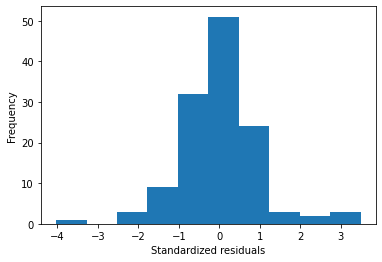

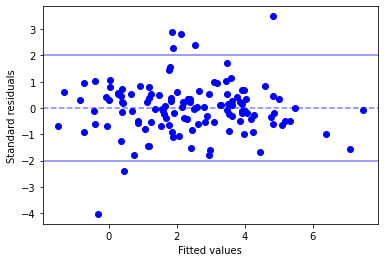

94.53% of the points fall within (-2,2).


In [51]:
plt.hist(model_sm.resid_pearson)
plt.xlabel('Standardized residuals')
plt.ylabel('Frequency')
plt.show()

plt.plot(model_sm.fittedvalues, model_sm.resid_pearson, 'o', color='b')
plt.axhline(-2, color='b', alpha=0.5)
plt.axhline(2, color='b', alpha=0.5)
plt.axhline(0, linestyle='--', color='b', alpha=0.5)
plt.xlabel('Fitted values')
plt.ylabel('Standard residuals')
plt.show()

print('%.2f%% of the points fall within (-2,2).'%(100*sum([1 for i in model_sm.resid_pearson if -2<i<2])/len(model_sm.resid_pearson)))

Residuals are distributed bell-shaped, and they are look homoscedastic.

Conclusions
for the 2000 year, 
1. the hypothesis 1 that GDP per capita across different democracy groups is the same cannot be rejected. 
2. we have  found  confirmation about the correlation between regime and growth of GDP: There is a monotonic correlation (0.38) between equal distribution of resources and GDP per capita, and (0.24) between political stabiliity and GDP per capita. 
3. For linear regression, we can see that Ownership of the state contributes negatively to the GDp per capita

# **2012 year**

Let's check the same hypotheses for the 2012

# Hypothesis 1. GDP per capita across different democracy groups is the same.  

In [52]:
df_2 = df_final[df_final['year'] == 2012]
df_2 = df_2.dropna()
print(df_2.groupby('Democracy').std())
print(df_2.groupby('Democracy').count())



           year  Distribution  Stability  Ownership  GDP per capita
Democracy                                                          
0.0         0.0      0.248089   0.817171   1.224984        3.032334
1.0         0.0      0.237169   0.653339   0.955617        3.685233
2.0         0.0      0.210284   0.526916   0.590763        3.360321
3.0         0.0      0.137973   0.539784   0.658087        2.829939
           Country  country_text_id  year  Distribution  Stability  Ownership  \
Democracy                                                                       
0.0             10               10    10            10         10         10   
1.0             46               46    46            46         46         46   
2.0             41               41    41            41         41         41   
3.0             31               31    31            31         31         31   

           GDP per capita  
Democracy                  
0.0                    10  
1.0                  

we can see that std is decrese with liberalization of regime: 

indicators for stability, ownership, distribution of resources in autocracies(0) varies a lot more then for liberal democracies

First, we need to check for the validity of its main assumptions:

Independence of the observations - Independence is straightforward: all our observations come from different countries which we can consider as independent.

Each sample has the same sample size - for 2012 year sample sized are different and in group of closed authtocracy is less then 30 observations.

Checking for the next assumptions are not nessecary as we already do not have same sample sizes 
Each sample has a normal distribution 
These distributions have the same variance (homoscedasticity)

 I will use Kruskai - Wallis

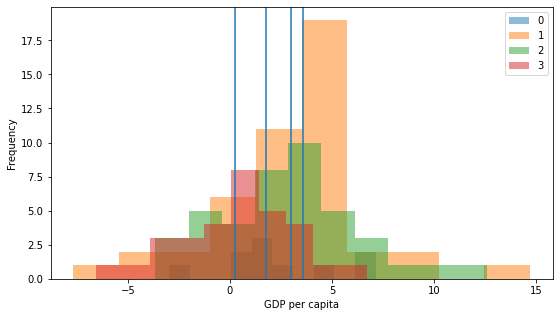

In [53]:
set(df_2.Democracy)
democracies = [0, 1, 2, 3]
plt.figure(figsize=(9,5))
for dem in democracies:
    plt.hist(df_2[df_2.Democracy==dem]['GDP per capita'],alpha=0.5,label=dem)
    plt.axvline(np.median(df_2[df_2.Democracy==dem]['GDP per capita']))
plt.xlabel('GDP per capita')
plt.ylabel('Frequency')
plt.legend()
plt.show()
# we can see that means are quite close to each other

visually all four distributions are similar, means are visualy different

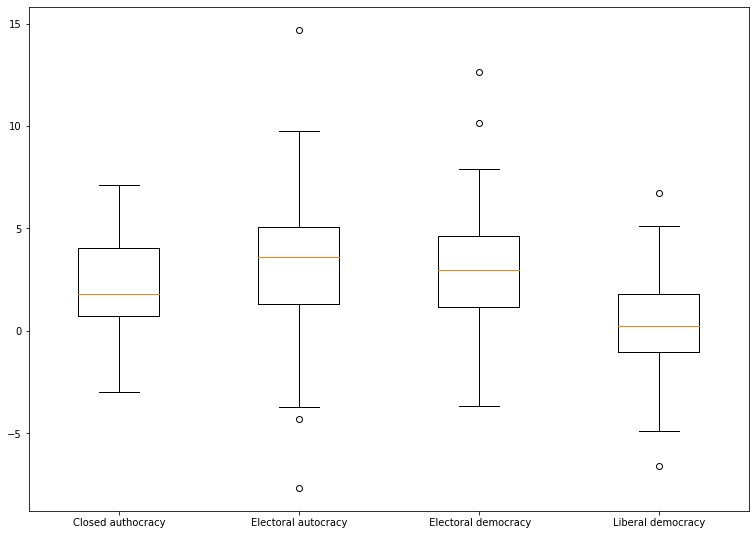

In [54]:
data = [df_2[df_2.Democracy==0]['GDP per capita'], df_2[df_2.Democracy==1]['GDP per capita'], df_2[df_2.Democracy==2]['GDP per capita'], df_2[df_2.Democracy==3]['GDP per capita']] 
   
fig = plt.figure(figsize =(10, 7)) 
   
# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1]) 
   
# Creating plot 
bp = ax.boxplot(data) 
# x-axis labels 
ax.set_xticklabels(['Closed authocracy', 'Electoral autocracy', ' Electoral democracy', 'Liberal democracy']) 
   
# show plot 
plt.show() 
#boxplot allow us to see variance of values, and means. 

visually boxplots show that means different, but variance of GDP is quite similar

In [55]:
array_0 = df_2[df_2.Democracy==0]['GDP per capita']
array_1 = df_2[df_2.Democracy==1]['GDP per capita']
array_2 = df_2[df_2.Democracy==2]['GDP per capita']
array_3 = df_2[df_2.Democracy==3]['GDP per capita']


In [56]:
stats.kruskal(array_0,array_1,array_2,array_3)

KruskalResult(statistic=14.735243652343343, pvalue=0.0020574659538203813)

In [57]:
print(df_2.groupby('Democracy').median())

             year  Distribution  Stability  Ownership  GDP per capita
Democracy                                                            
0.0        2012.0        0.5125    -0.1620    -0.1805        1.785011
1.0        2012.0        0.3420    -0.7825     0.3195        3.592248
2.0        2012.0        0.5300    -0.1190     0.9590        2.981273
3.0        2012.0        0.9350     1.2290     1.4590        0.230161


null hypotesis can be rejected, p-value is 0.002< 0.05

 GDP per capita are not the same for the different regimes

In [70]:
np.median(array_0), np.median(array_1), np.median(array_2), np.median(array_3)

(1.78501086186037, 3.59224808537058, 2.98127287338662, 0.230160992711959)

In [71]:
stats.kruskal(array_0,array_1)

KruskalResult(statistic=0.43981693363841146, pvalue=0.5072108269253821)

In [72]:
stats.mannwhitneyu(array_0,array_1)

MannwhitneyuResult(statistic=199.0, pvalue=0.5140848712709818)

--> We cannot reject the null hypothesis that GDP per capita in closed autocracy and electoral autocracy have the same median

In [73]:
stats.kruskal(array_0,array_2)

KruskalResult(statistic=0.18236397748592026, pvalue=0.6693494976480441)

In [74]:
stats.mannwhitneyu(array_0,array_2)

MannwhitneyuResult(statistic=187.0, pvalue=0.6780110855249148)

--> We cannot reject the null hypothesis that GDP per capita in closed autocracy and electoral democracy have the same median

In [75]:
stats.kruskal(array_0,array_3)

KruskalResult(statistic=3.5428571428571445, pvalue=0.05980236528230661)

In [76]:
stats.mannwhitneyu(array_0,array_3)

MannwhitneyuResult(statistic=217.0, pvalue=0.061892025740522494)

--> We cannot reject the null hypothesis that GDP per capita in closed autocracy and liberal democracy have the same median

In [83]:
stats.kruskal(array_1,array_2)

KruskalResult(statistic=0.3149522799575948, pvalue=0.5746570490867547)

In [84]:
stats.mannwhitneyu(array_1,array_2)

MannwhitneyuResult(statistic=1009.0, pvalue=0.5775584944550924)

--> We cannot reject the null hypothesis that GDP per capita in elecoral autocracy and electoral democracy have the same median

In [79]:
stats.kruskal(array_1,array_3)

KruskalResult(statistic=13.291725105189329, pvalue=0.000266580081237854)

In [80]:
stats.mannwhitneyu(array_1,array_3)

MannwhitneyuResult(statistic=1064.0, pvalue=0.0002720156901235071)

--> We can reject the null hypothesis that GDP per capita in elecoral autocracy and liberal democracy have the same median

In [81]:
stats.kruskal(array_2,array_3)

KruskalResult(statistic=8.979953224189757, pvalue=0.002729576357941407)

In [82]:
stats.mannwhitneyu(array_2,array_3)

MannwhitneyuResult(statistic=899.0, pvalue=0.002780921275102037)

--> We cannot reject the null hypothesis that GDP per capita in elecoral democracy and liberal democracy have the same median

GDP per capita in elecoral autocracy and liberal democracy are different - 3.592 and 0.23.
GDP per capita in elecoral democracy and liberal democracy do not have the same median 2.98 and 0.23.
To conclude,  the gwrowth of GDP is higher in electoral autocracy then in liberal democracy, and in electoral democracy then in liberal autocracy. It might be a sigh that hybrid regimes are grow better then democracies. 

# Hypothesis 2. The level of democracy, equal distribution of resources, political stability, state ownership of economy correlates with economic growth of the country. 
Part  of  the  variables  are  continuous,  while  others  have  ordinal  scale.  It  makes  the  Spearman  correlation  most 
suitable method to test correlation between these variables.  
H0: there is no monotonic relationship between the democracy and the GDP per capita in the population.  
H0: there is no monotonic relationship between the equal distribution of resources and the GDP per capita in the 
population.  
H0: there is no monotonic relationship between the political stability and the GDP per capita in the population. 
H0: there is no monotonic relationship between the state ownership and the GDP per capita in the population. 

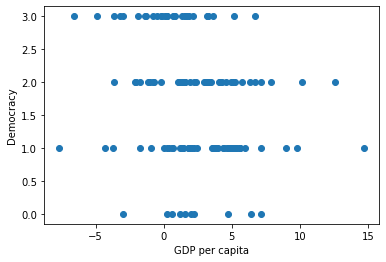

In [284]:
#H0: there is no monotonic relationship between the democracy and the GDP per capita in the population. 
#plotting scatterplot
indicator_1 = 'GDP per capita'
indicator_2 = 'Democracy'

x = df_2[indicator_1]
y = df_2[indicator_2]

plt.plot(x,y,'o')
plt.xlabel(indicator_1)
plt.ylabel(indicator_2)
plt.show()

In [285]:
stats.spearmanr(x,y)

SpearmanrResult(correlation=-0.26914883509590004, pvalue=0.002125603848549846)

null hypotesis can be rejected, p-value is 0.002 < 0.05. there is a negative monotonic relationship (-0.27) between the democracy and the GDP per capita in the population. 

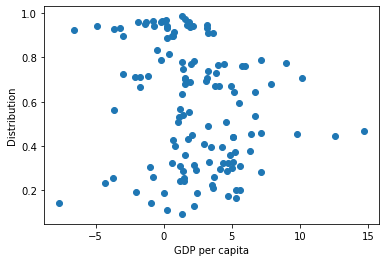

In [286]:
#H0: there is no monotonic relationship between the equal distribution of resources and the GDP per capita in the population.
indicator_1 = 'GDP per capita'
indicator_2 = 'Distribution'
x = df_2[indicator_1]
y = df_2[indicator_2]

plt.plot(x,y,'o')
plt.xlabel(indicator_1)
plt.ylabel(indicator_2)
plt.show()

In [287]:
stats.spearmanr(x,y)

SpearmanrResult(correlation=-0.2539095304013844, pvalue=0.003827614497196326)

p value 0.004 is less then 0.05, and we can reject null hypothesis. There is a positive monotonic correlation (0.25) between equal distribution of resources and GDP per capita. 

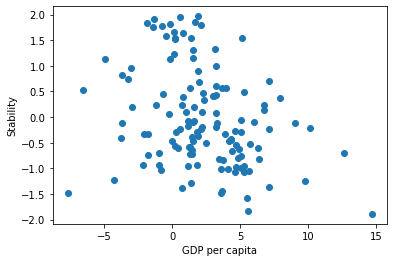

In [288]:
#H0: there is no monotonic relationship between the political stability and the GDP per capita in the population.
indicator_1 = 'GDP per capita'
indicator_2 = 'Stability'
x = df_2[indicator_1]
y = df_2[indicator_2]
plt.plot(x,y,'o')

plt.xlabel(indicator_1)
plt.ylabel(indicator_2)
plt.show()

In [289]:
stats.spearmanr(x,y)

SpearmanrResult(correlation=-0.30497437064712696, pvalue=0.0004647098522736344)

null hypotesis can be rejected, p-value is 0.00 < 0.05.  there is negative monotonic relationship (-0.3) between the political stability and the GDP per capita in the population.

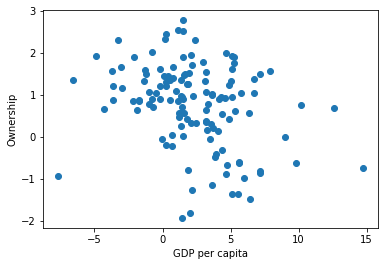

In [290]:
#H0: there is no monotonic relationship between the state ownership and the GDP per capita in the population. 
indicator_1 = 'GDP per capita'
indicator_2 = 'Ownership'
x = df_2[indicator_1]
y = df_2[indicator_2]
plt.plot(x,y,'o')

plt.xlabel(indicator_1)
plt.ylabel(indicator_2)
plt.show()

In [291]:
stats.spearmanr(x,y)

SpearmanrResult(correlation=-0.30917617302410083, pvalue=0.0003837287394518265)

null hypotesis cannot be rejected, p-value is 0.00 < 0.05. there is negative monotonic relationship (-0.31) between the state ownership and the GDP per capita in the population. 

#  What factors, connected with democracy, affect economic growth the most?
H0: beta coefficient is equal to zero

method: linear regression

In [293]:
target = 'GDP per capita'
input_vars = ['Democracy',
            'Distribution', 
              'Stability', 
              'Ownership'
            ]
np.asarray(df_2)

array([['Mexico', 'MEX', 2012, ..., 0.477, 0.986, 2.24713983020912],
       ['Suriname', 'SUR', 2012, ..., -0.473, 0.012, 1.53869362118127],
       ['Sweden', 'SWE', 2012, ..., 1.908, 1.586, -1.32100232444557],
       ...,
       ['Singapore', 'SGP', 2012, ..., 1.966, -0.784, 1.90446223662212],
       ['Solomon Islands', 'SLB', 2012, ..., -1.041, 0.893,
        -0.799651385948181],
       ['Vanuatu', 'VUT', 2012, ..., -0.731, 0.855, -1.76192124880252]],
      dtype=object)

<AxesSubplot:>

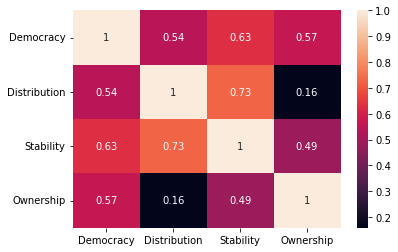

In [294]:
sns.heatmap(df_2[input_vars].corr(),annot=True)

In [295]:
X = df_2[input_vars]

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) 
                     for i in range(X.shape[1])]

In [296]:
vif

,features,VIF Factor
0,Democracy,9.096375
1,Distribution,6.315608
2,Stability,1.196373
3,Ownership,2.724873


Variables are correlate with each other strongly, let's use subset selection to choose variables for the linear model. 

In [297]:
var_combinations = []
for n in range(len(input_vars) + 1):
    combinations_length_n = list(combinations(input_vars, n))
    for comb in combinations_length_n:
        var_list = [x for x in comb]
        var_combinations.append(var_list)

In [298]:
n=3
combinations_length_n = list(combinations(input_vars, n))
print(combinations_length_n)

[('Democracy', 'Distribution', 'Stability'), ('Democracy', 'Distribution', 'Ownership'), ('Democracy', 'Stability', 'Ownership'), ('Distribution', 'Stability', 'Ownership')]


In [299]:
var_combinations

[[],
 ['Democracy'],
 ['Distribution'],
 ['Stability'],
 ['Ownership'],
 ['Democracy', 'Distribution'],
 ['Democracy', 'Stability'],
 ['Democracy', 'Ownership'],
 ['Distribution', 'Stability'],
 ['Distribution', 'Ownership'],
 ['Stability', 'Ownership'],
 ['Democracy', 'Distribution', 'Stability'],
 ['Democracy', 'Distribution', 'Ownership'],
 ['Democracy', 'Stability', 'Ownership'],
 ['Distribution', 'Stability', 'Ownership'],
 ['Democracy', 'Distribution', 'Stability', 'Ownership']]

In [300]:
y = df_2[target]
adj_rsquared_results = []
for comb in var_combinations:
    
    X = df_2[comb]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()

    print(comb,model.rsquared_adj)
    adj_rsquared_results.append((model.rsquared_adj, comb))

[] 0.0
['Democracy'] 0.04744824453840535
['Distribution'] 0.034903670123508146
['Stability'] 0.08466708938267697
['Ownership'] 0.08348440526439482
['Democracy', 'Distribution'] 0.048796277497466845
['Democracy', 'Stability'] 0.08048591243291403
['Democracy', 'Ownership'] 0.082192903996682
['Distribution', 'Stability'] 0.07777185881972404
['Distribution', 'Ownership'] 0.10231151626065194
['Stability', 'Ownership'] 0.10881215822846357
['Democracy', 'Distribution', 'Stability'] 0.07397300208642199
['Democracy', 'Distribution', 'Ownership'] 0.0952966698600497
['Democracy', 'Stability', 'Ownership'] 0.10180055856400205
['Distribution', 'Stability', 'Ownership'] 0.10315922232959163
['Democracy', 'Distribution', 'Stability', 'Ownership'] 0.09662602214855653


In [301]:
sorted(adj_rsquared_results, reverse= True)


[(0.10881215822846357, ['Stability', 'Ownership']),
 (0.10315922232959163, ['Distribution', 'Stability', 'Ownership']),
 (0.10231151626065194, ['Distribution', 'Ownership']),
 (0.10180055856400205, ['Democracy', 'Stability', 'Ownership']),
 (0.09662602214855653,
  ['Democracy', 'Distribution', 'Stability', 'Ownership']),
 (0.0952966698600497, ['Democracy', 'Distribution', 'Ownership']),
 (0.08466708938267697, ['Stability']),
 (0.08348440526439482, ['Ownership']),
 (0.082192903996682, ['Democracy', 'Ownership']),
 (0.08048591243291403, ['Democracy', 'Stability']),
 (0.07777185881972404, ['Distribution', 'Stability']),
 (0.07397300208642199, ['Democracy', 'Distribution', 'Stability']),
 (0.048796277497466845, ['Democracy', 'Distribution']),
 (0.04744824453840535, ['Democracy']),
 (0.034903670123508146, ['Distribution']),
 (0.0, [])]

In [302]:
max(adj_rsquared_results)

(0.10881215822846357, ['Stability', 'Ownership'])

model shows best result with variables ownership and stability. I will use them in the linear model

In [303]:
selected_vars = max(adj_rsquared_results)[1]
selected_vars

['Stability', 'Ownership']

In [304]:
# define the variables
X = df_2[selected_vars]
y = df_2[target]

# add constant to predictor variables (i.e. the intercept)
X = sm.add_constant(X)

# fit linear regression model
model_sm = sm.OLS(y, X).fit()

# view model summary
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:         GDP per capita   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     8.753
Date:                Mon, 02 Jan 2023   Prob (F-statistic):           0.000277
Time:                        17:34:26   Log-Likelihood:                -332.36
No. Observations:                 128   AIC:                             670.7
Df Residuals:                     125   BIC:                             679.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7801      0.392      7.097      0.0

All the variables are significant with 95% confidence, Adj. R-squared is 0.109. 
The share of the economy, controlled by state negatively contributes to the GDP growth of the country.
The political stability  negatively contributes to the GDP growth of the country.

All things being equal, a one full point in ownership score increase is associated with -0.71 unit decrease in GDP growth per capita.
All things being equal, a one full point in politicl stability score increase is associated with -0.75 unit decrease in GDP growth per capita.

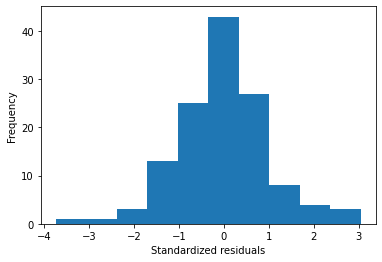

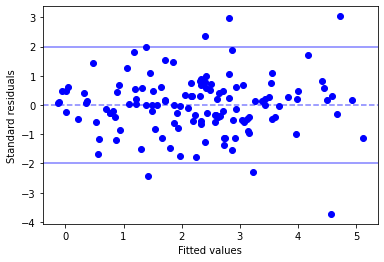

95.31% of the points fall within (-2,2).


In [305]:
plt.hist(model_sm.resid_pearson)
plt.xlabel('Standardized residuals')
plt.ylabel('Frequency')
plt.show()

plt.plot(model_sm.fittedvalues, model_sm.resid_pearson, 'o', color='b')
plt.axhline(-2, color='b', alpha=0.5)
plt.axhline(2, color='b', alpha=0.5)
plt.axhline(0, linestyle='--', color='b', alpha=0.5)
plt.xlabel('Fitted values')
plt.ylabel('Standard residuals')
plt.show()

print('%.2f%% of the points fall within (-2,2).'%(100*sum([1 for i in model_sm.resid_pearson if -2<i<2])/len(model_sm.resid_pearson)))

Residuals are distributed bell-shaped, and they are looked homoscedastic.

Conclusions for the 2012 year:
1. GDP per capita are not the same in all four regime groups. Liberal democracy has the worst result, compared by pairs with elecoral democracy and electoral autocracy. 
2.  there is a negative monotonic correlation (-0.27) between the democracy and the GDP per capita in the population. 
    There is a positive monotonic correlation (0.25) between equal distribution of resources and GDP per capita. 
    there is negative monotonic correlation (-0.3) between the political stability and the GDP per capita in the population.
    there is negative monotonic correlation (-0.31) between the state ownership and the GDP per capita in the population.
3. All the variables are significant with 95% confidence. The share of the economy, controlled by state negatively contributes to the GDP growth of the country. The political stability negatively contributes to the GDP growth of the country.

# 2019

# Hypothesis 1. GDP per capita across different democracy groups is the same.  

In [344]:
df_3 = df_final[df_final['year'] == 2019]
df_3 = df_3.dropna()
print(df_3.groupby('Democracy').count())
print(df_3.groupby('Democracy').std())

           Country  country_text_id  year  Distribution  Stability  Ownership  \
Democracy                                                                       
0.0             12               12    12            12         12         12   
1.0             48               48    48            48         48         48   
2.0             40               40    40            40         40         40   
3.0             28               28    28            28         28         28   

           GDP per capita  
Democracy                  
0.0                    12  
1.0                    48  
2.0                    40  
3.0                    28  
           year  Distribution  Stability  Ownership  GDP per capita
Democracy                                                          
0.0         0.0      0.224563   0.886369   1.062571        3.330044
1.0         0.0      0.227822   0.624744   1.017891        3.426476
2.0         0.0      0.239450   0.584597   0.660177        2.162701
3.0  

in terms f std this year is not similar to the previous two - std is not decreasing with such stability with liberalization of regime.


First, we need to check for the validity of its main assumptions:

Independence of the observations - Independence is straightforward: all our observations come from different countries which we can consider as independent.

Each sample has the same sample size - for 2019 year sample sized are different and in group of closed authtocracy and liber democracy are less then 30 observations.

Checking for the next assumptions are not nessecary as we already do not have same sample sizes Each sample has a normal distribution These distributions have the same variance (homoscedasticity)

I will use Kruskai - Wallis

In [307]:
set(df_3.Democracy)
democracies = [0, 1, 2, 3]

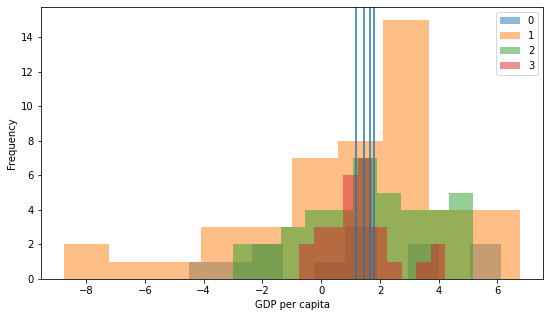

In [308]:
plt.figure(figsize=(9,5))
for dem in democracies:
    plt.hist(df_3[df_3.Democracy==dem]['GDP per capita'],alpha=0.5,label=dem)
    plt.axvline(np.median(df_3[df_3.Democracy==dem]['GDP per capita']))
plt.xlabel('GDP per capita')
plt.ylabel('Frequency')
plt.legend()
plt.show()

visually all four distributions are similar, means are close.

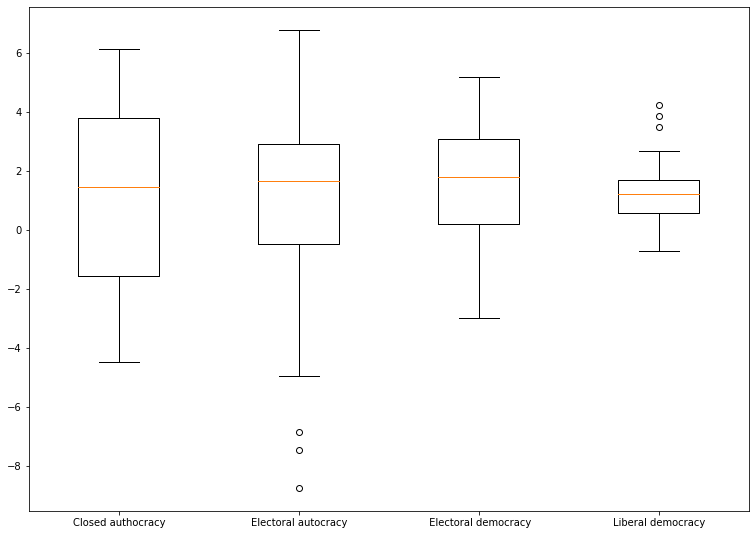

In [309]:
data = [df_3[df_3.Democracy==0]['GDP per capita'], df_3[df_3.Democracy==1]['GDP per capita'], df_3[df_3.Democracy==2]['GDP per capita'], df_3[df_3.Democracy==3]['GDP per capita']] 
   
fig = plt.figure(figsize =(10, 7)) 
   
# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1]) 
   
# Creating plot 
bp = ax.boxplot(data) 
# x-axis labels 
ax.set_xticklabels(['Closed authocracy', 'Electoral autocracy', ' Electoral democracy', 'Liberal democracy']) 
   
# show plot 
plt.show() 

in boxplots visually the variance of the liberal democracy is the smallest, means are similar. 

In [310]:
array_0 = df_3[df_3.Democracy==0]['GDP per capita']
array_1 = df_3[df_3.Democracy==1]['GDP per capita']
array_2 = df_3[df_3.Democracy==2]['GDP per capita']
array_3 = df_3[df_3.Democracy==3]['GDP per capita']


In [311]:
stats.kruskal(array_0,array_1,array_2,array_3)

KruskalResult(statistic=0.9851752837763001, pvalue=0.804839038040127)

p-value 0.8 > 0.05 --> We cannnot reject the null hypothesis that the population medians of all the groups are the same.

# Hypothesis 2. The level of democracy, equal distribution of resources, political stability, state ownership of economy correlates with economic growth of the country. 
Part  of  the  variables  are  continuous,  while  others  have  ordinal  scale.  It  makes  the  Spearman  correlation  most 
suitable method to test correlation between these variables.  
H0: there is no monotonic relationship between the democracy and the GDP per capita in the population.  
H0: there is no monotonic relationship between the equal distribution of resources and the GDP per capita in the 
population.  
H0: there is no monotonic relationship between the political stability and the GDP per capita in the population. 
H0: there is no monotonic relationship between the state ownership and the GDP per capita in the population. 

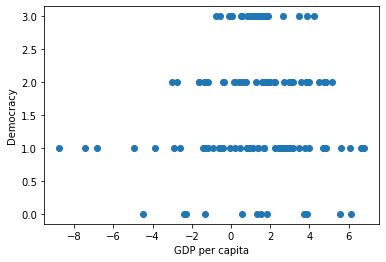

In [312]:
#H0: there is no monotonic relationship between the democracy and the GDP per capita in the population.
indicator_1 = 'GDP per capita'
indicator_2 = 'Democracy'

x = df_3[indicator_1]
y = df_3[indicator_2]

plt.plot(x,y,'o')
plt.xlabel(indicator_1)
plt.ylabel(indicator_2)
plt.show()

In [313]:
stats.spearmanr(x,y)

SpearmanrResult(correlation=-0.02827570293020701, pvalue=0.7513739323498438)

null hypotesis cannot be rejected, p-value is 0.75 > 0.05

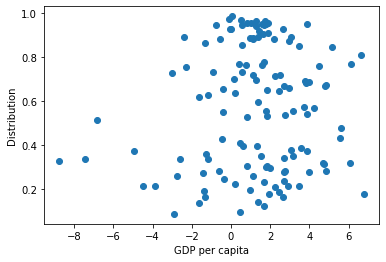

In [314]:
#H0: there is no monotonic relationship between the equal distribution of resources and the GDP per capita in the population.
indicator_1 = 'GDP per capita'
indicator_2 = 'Distribution'

x = df_3[indicator_1]
y = df_3[indicator_2]

plt.plot(x,y,'o')
plt.xlabel(indicator_1)
plt.ylabel(indicator_2)
plt.show()

In [315]:
stats.spearmanr(x,y)

SpearmanrResult(correlation=0.009668083451009179, pvalue=0.9137486872656607)

null hypotesis cannot be rejected, p-value is 0.91 > 0.05

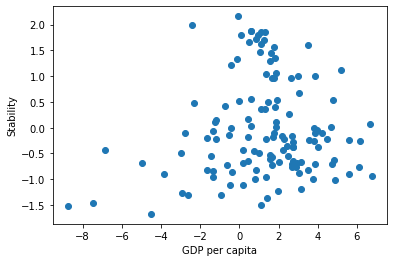

In [316]:
#H0: there is no monotonic relationship between the political stability and the GDP per capita in the population. 
indicator_1 = 'GDP per capita'
indicator_2 = 'Stability'

x = df_3[indicator_1]
y = df_3[indicator_2]

plt.plot(x,y,'o')
plt.xlabel(indicator_1)
plt.ylabel(indicator_2)
plt.show()

In [317]:
stats.spearmanr(x,y)

SpearmanrResult(correlation=0.01915866124008174, pvalue=0.8300410802443894)

null hypotesis cannot be rejected, p-value is 0.83 > 0.05

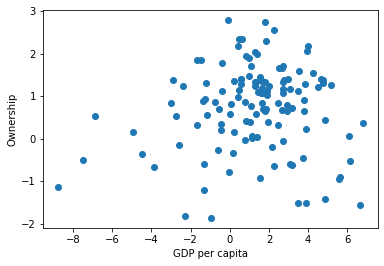

In [318]:
#H0: there is no monotonic relationship between the state ownership and the GDP per capita in the population.
indicator_1 = 'GDP per capita'
indicator_2 = 'Ownership'

x = df_3[indicator_1]
y = df_3[indicator_2]

plt.plot(x,y,'o')
plt.xlabel(indicator_1)
plt.ylabel(indicator_2)
plt.show()

In [319]:
stats.spearmanr(x,y)

SpearmanrResult(correlation=0.04658648557245677, pvalue=0.6015455884759044)

null hypotesis cannot be rejected, p-value is 0.6 > 0.05

#  What factors, connected with democracy, affect economic growth the most?
H0: beta coefficient is equal to zero

method: linear regression

In [320]:
target = 'GDP per capita'
input_vars = ['Democracy',
            'Distribution', 
              'Stability', 
              'Ownership'
            ]
np.asarray(df_3)

array([['Mexico', 'MEX', 2019, ..., 0.104, 0.938, -1.26932197948273],
       ['Suriname', 'SUR', 2019, ..., -0.68, -0.331, 0.163586537511492],
       ['Sweden', 'SWE', 2019, ..., 1.802, 1.466, 0.957561656419784],
       ...,
       ['Singapore', 'SGP', 2019, ..., 2.162, -0.784,
        -0.0545548569257619],
       ['Solomon Islands', 'SLB', 2019, ..., -0.832, 0.893,
        -1.35880348421169],
       ['Vanuatu', 'VUT', 2019, ..., -0.461, 0.855, 0.760014262428172]],
      dtype=object)

<AxesSubplot:>

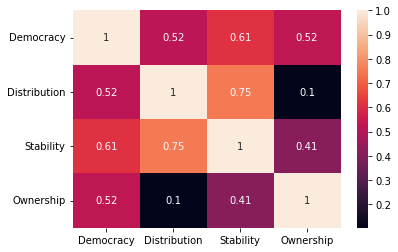

In [321]:
sns.heatmap(df_3[input_vars].corr(),annot=True)

In [322]:
X = df_3[input_vars]

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) 
                     for i in range(X.shape[1])]

In [323]:
vif

,features,VIF Factor
0,Democracy,7.806654
1,Distribution,5.628501
2,Stability,1.159347
3,Ownership,2.351173


variables are correlate with each other, so I will use subset selection to improve the model

In [324]:
var_combinations = []
for n in range(len(input_vars) + 1):
    combinations_length_n = list(combinations(input_vars, n))
    for comb in combinations_length_n:
        var_list = [x for x in comb]
        var_combinations.append(var_list)

In [325]:
n=3
combinations_length_n = list(combinations(input_vars, n))
print(combinations_length_n)

[('Democracy', 'Distribution', 'Stability'), ('Democracy', 'Distribution', 'Ownership'), ('Democracy', 'Stability', 'Ownership'), ('Distribution', 'Stability', 'Ownership')]


In [326]:
var_combinations

[[],
 ['Democracy'],
 ['Distribution'],
 ['Stability'],
 ['Ownership'],
 ['Democracy', 'Distribution'],
 ['Democracy', 'Stability'],
 ['Democracy', 'Ownership'],
 ['Distribution', 'Stability'],
 ['Distribution', 'Ownership'],
 ['Stability', 'Ownership'],
 ['Democracy', 'Distribution', 'Stability'],
 ['Democracy', 'Distribution', 'Ownership'],
 ['Democracy', 'Stability', 'Ownership'],
 ['Distribution', 'Stability', 'Ownership'],
 ['Democracy', 'Distribution', 'Stability', 'Ownership']]

In [327]:
y = df_3[target]

adj_rsquared_results = []
for comb in var_combinations:
    
    X = df_3[comb]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()

    print(comb,model.rsquared_adj)
    adj_rsquared_results.append((model.rsquared_adj, comb))

[] -2.220446049250313e-16
['Democracy'] -0.006002133731460191
['Distribution'] 0.0007300114412501779
['Stability'] 0.0015410537083356823
['Ownership'] -0.0012974457432544106
['Democracy', 'Distribution'] -0.007238491979089101
['Democracy', 'Stability'] -0.006040604580361375
['Democracy', 'Ownership'] -0.00930576539420791
['Distribution', 'Stability'] -0.005512095062354616
['Distribution', 'Ownership'] -0.0020024541148608854
['Stability', 'Ownership'] -0.00435462541613485
['Democracy', 'Distribution', 'Stability'] -0.013053759116972152
['Democracy', 'Distribution', 'Ownership'] -0.007102144769527419
['Democracy', 'Stability', 'Ownership'] -0.010799419693401369
['Distribution', 'Stability', 'Ownership'] -0.010046188755602481
['Democracy', 'Distribution', 'Stability', 'Ownership'] -0.015053342327379315


In [328]:
sorted(adj_rsquared_results, reverse= True)


[(0.0015410537083356823, ['Stability']),
 (0.0007300114412501779, ['Distribution']),
 (-2.220446049250313e-16, []),
 (-0.0012974457432544106, ['Ownership']),
 (-0.0020024541148608854, ['Distribution', 'Ownership']),
 (-0.00435462541613485, ['Stability', 'Ownership']),
 (-0.005512095062354616, ['Distribution', 'Stability']),
 (-0.006002133731460191, ['Democracy']),
 (-0.006040604580361375, ['Democracy', 'Stability']),
 (-0.007102144769527419, ['Democracy', 'Distribution', 'Ownership']),
 (-0.007238491979089101, ['Democracy', 'Distribution']),
 (-0.00930576539420791, ['Democracy', 'Ownership']),
 (-0.010046188755602481, ['Distribution', 'Stability', 'Ownership']),
 (-0.010799419693401369, ['Democracy', 'Stability', 'Ownership']),
 (-0.013053759116972152, ['Democracy', 'Distribution', 'Stability']),
 (-0.015053342327379315,
  ['Democracy', 'Distribution', 'Stability', 'Ownership'])]

In [329]:
#the best model is with variable Democracy
max(adj_rsquared_results)

(0.0015410537083356823, ['Stability'])

In [330]:
selected_vars = max(adj_rsquared_results)[1]
selected_vars

['Stability']

In [331]:
# define the variables
X = df_3[selected_vars]
y = df_3[target]

# add constant to predictor variables (i.e. the intercept)
X = sm.add_constant(X)

# fit linear regression model
model_sm = sm.OLS(y, X).fit()

# view model summary
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:         GDP per capita   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.196
Date:                Mon, 02 Jan 2023   Prob (F-statistic):              0.276
Time:                        17:34:28   Log-Likelihood:                -305.83
No. Observations:                 128   AIC:                             615.7
Df Residuals:                     126   BIC:                             621.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2817      0.235      5.450      0.0

Variable Stability is not significant, Adj. R-squared is 0.002.

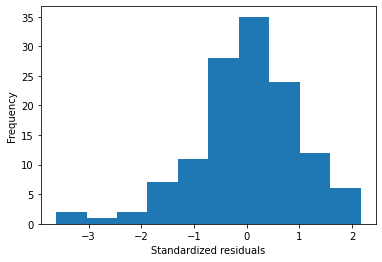

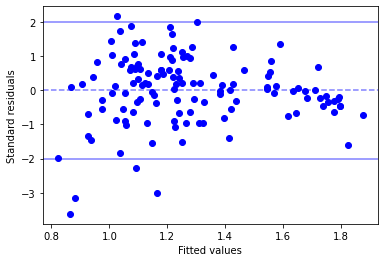

95.31% of the points fall within (-2,2).


In [332]:
plt.hist(model_sm.resid_pearson)
plt.xlabel('Standardized residuals')
plt.ylabel('Frequency')
plt.show()

plt.plot(model_sm.fittedvalues, model_sm.resid_pearson, 'o', color='b')
plt.axhline(-2, color='b', alpha=0.5)
plt.axhline(2, color='b', alpha=0.5)
plt.axhline(0, linestyle='--', color='b', alpha=0.5)
plt.xlabel('Fitted values')
plt.ylabel('Standard residuals')
plt.show()

print('%.2f%% of the points fall within (-2,2).'%(100*sum([1 for i in model_sm.resid_pearson if -2<i<2])/len(model_sm.resid_pearson)))

Residuals are distributed bell-shaped, and they are looked homoscedastic.

Model is bad, Stabiluty is not significant. Null hypothesis cannot be rejected

Conclusions for the 2019 year, we have not found any confirmation about the correlation between regime and growth of GDP. Every one of the three hypotheses cannot be rejected. It means in 2019 autocracy and democracy had equal chances to have small or big economic growth.

# Conclusions
for different year we can make different conclusions: for 2012 all three hypotheses can be rejected, while for 2019 none. For now, the conclusions are possible only for the years, without repititive results. This research should be repeated with more temporal data.  

Limitations
1. Variable political stability is based on expert evaluation, not factual data
2. Autocracies' national banks tend to overestimate the GDP, so the data can be biased 
3. Only three years were analysed.Data about GDP and other variables were limited, so it is impossible to check hypotheses for more years. 
